<div style="display: flex; align-items: center; justify-content: center; text-align: center;">
  <img src="https://coursereport-s3-production.global.ssl.fastly.net/uploads/school/logo/219/original/CT_LOGO_NEW.jpg" width="100" style="margin-right: 10px;">
  <div>
    <h1><b>Applied Lesson - College Admissions</b></h1>
  </div>
</div>


### Learning Objectives
*After this lesson, you will be able to:*

- Gather, clean, explore and model a dataset from scratch.
- Split data into testing and training sets and apply the technique to score a model.


# <span style="color:#D34B47">📌 Imports and Reading in the Dataset </span>

## Importing libaries
---

We'll need the following libraries for today's lesson:

1. `pandas`
2. `numpy`
3. `seaborn`
4. `matplotlib.pyplot`
4. `train_test_split` from `sklearn`'s `model_selection` module
5. `LinearRegression`from `sklearn`'s `linear_model` module
6. `mean_squared_error` from `sklearn`'s `metrics` module

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


## Load the Data

---

Today's [dataset](http://www-bcf.usc.edu/~gareth/ISL/data.html) (`College.csv`) is from the [ISLR website](https://cran.r-project.org/web/packages/ISLR/ISLR.pdf) on page 5.

Rename `Unnamed: 0` to `University`.

In [3]:
df = pd.read_csv('/gdrive/MyDrive/Coding Temple/7 - Machine Learning Regression/Coding-Temple-M7-Applied-College-Admissions/data/College.csv')
df.rename(columns={'Unnamed: 0': 'University'}, inplace=True)
df.head()

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


 Lowercase and snakecase all column names.

In [4]:
df.columns = df.columns.str.lower().str.replace('.', '_')
df.head()

,university,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


# <span style="color:#D34B47">📌 Data Cleaning </span>

## Initial check
---

Check the following in the cells below:
1. Do we have any null values?
2. Are any numerical columns being read in as `object`?

In [5]:
# Check for nulls
df.isnull().sum()

,0
university,0
private,0
apps,0
accept,0
enroll,0
top10perc,0
top25perc,0
f_undergrad,0
p_undergrad,0
outstate,0


In [6]:
# Check column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   university   777 non-null    object 
 1   private      777 non-null    object 
 2   apps         777 non-null    int64  
 3   accept       777 non-null    int64  
 4   enroll       777 non-null    int64  
 5   top10perc    777 non-null    int64  
 6   top25perc    777 non-null    int64  
 7   f_undergrad  777 non-null    int64  
 8   p_undergrad  777 non-null    int64  
 9   outstate     777 non-null    int64  
 10  room_board   777 non-null    int64  
 11  books        777 non-null    int64  
 12  personal     777 non-null    int64  
 13  phd          777 non-null    object 
 14  terminal     777 non-null    int64  
 15  s_f_ratio    777 non-null    float64
 16  perc_alumni  777 non-null    int64  
 17  expend       777 non-null    int64  
 18  grad_rate    777 non-null    int64  
dtypes: float

In [7]:
# Hmm... PHD
df['phd'].value_counts()

,count
phd,
?,29
77,26
73,24
90,22
71,21
...,...
34,1
31,1
41,1


## Clean up `PhD` column
---

`PhD` is being read in as a string because some of the cells contain non-numerical values. In the cell below, replace any non-numerical values with `NaN`'s, and change the column datatype to float.

In [8]:
df['phd'] = pd.to_numeric(df['phd'], errors='coerce')

## Drop `NaN`'s
---

Since there are a small percentage of null cells, let's go ahead and drop them.

In [9]:
df.isnull().sum()

,0
university,0
private,0
apps,0
accept,0
enroll,0
top10perc,0
top25perc,0
f_undergrad,0
p_undergrad,0
outstate,0


In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

,0
university,0
private,0
apps,0
accept,0
enroll,0
top10perc,0
top25perc,0
f_undergrad,0
p_undergrad,0
outstate,0


# <span style="color:#D34B47">📌 Feature Engineering </span>

## Binarize `'Private'` column
---

In the cells below, convert the `Private` column into numerical values.

In [12]:
df['private'] = df['private'].map({'Yes': 1, 'No': 0})

In [13]:
df.head()

,university,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70.0,78,18.1,12,7041,60
1,Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29.0,30,12.2,16,10527,56
2,Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53.0,66,12.9,30,8735,54
3,Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92.0,97,7.7,37,19016,59
4,Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76.0,72,11.9,2,10922,15


# <span style="color:#D34B47">📌 Exploratory Data Analysis </span>

## EDA: `apps`

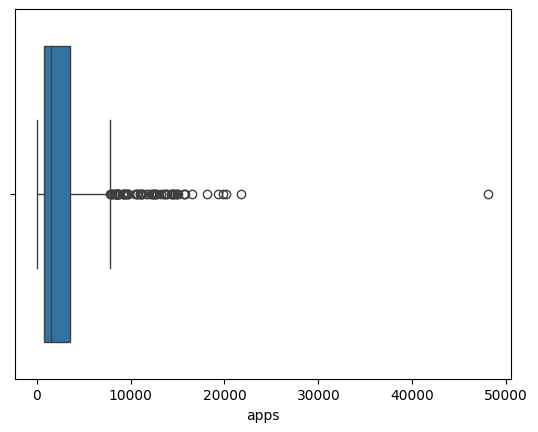

In [14]:
# Box plot of target variable
sns.boxplot(x=df['apps'])
plt.show()

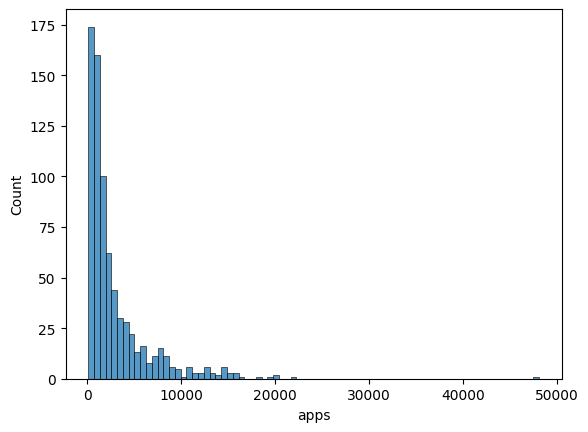

In [15]:
# Histogram
sns.histplot(df['apps'])
plt.show()

In [16]:
# Let's the find outlier for the 'apps' column
df['apps'].max()

48094

In [21]:
# We will drop this outlying value
df = df[df['apps'] != df['apps'].max()]

In [17]:
# We can make a decision to drop the outlier, if we want! Test it!


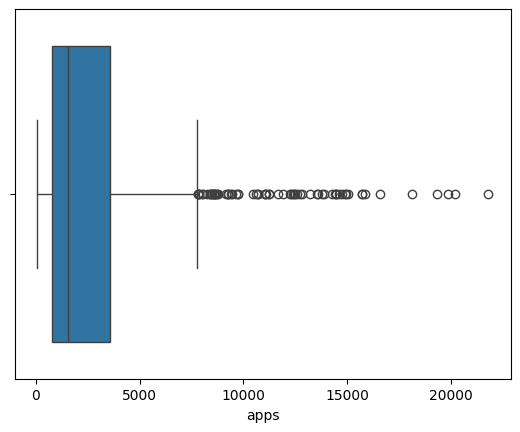

In [22]:
# Box plot
sns.boxplot(x=df['apps'])
plt.show()

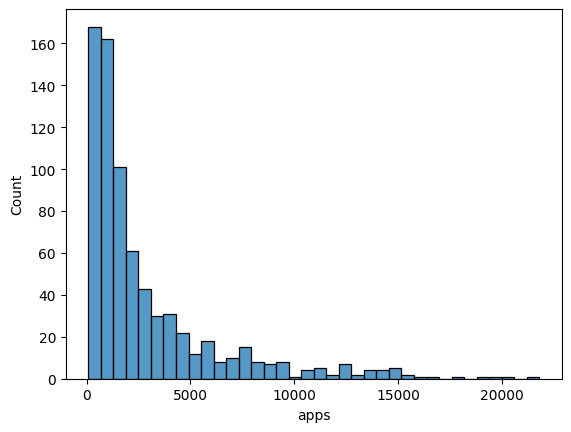

In [23]:
# Histogram
sns.histplot(df['apps'])
plt.show()

## EDA: What else do we want to explore?
---

In [24]:
df['log_apps'] = np.log(df['apps'])

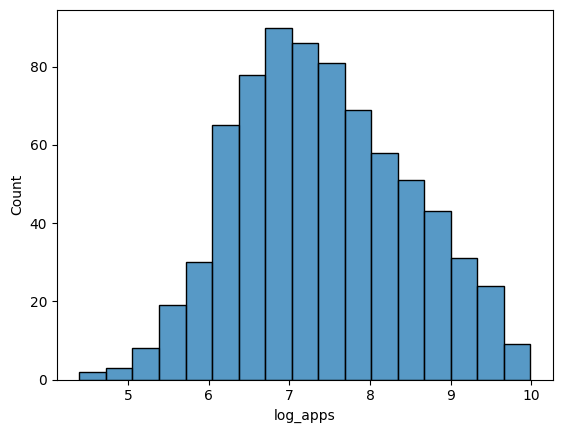

In [25]:
sns.histplot(df['log_apps'])
plt.show()

In [28]:
df.describe()  # We see that max(phd) and max(grad_rate) are > 100% which cannot be.  Force those max values to be 100%

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate,log_apps
count,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,0.728246,2910.666667,1968.243641,769.631861,27.465863,55.730924,3660.485944,852.986613,10418.489960,4359.144578,549.164659,1339.187416,72.495315,79.593039,14.067068,22.844712,9600.455154,65.404284,7.409378
std,0.445162,3484.046511,2265.944031,916.220783,17.479206,19.662328,4820.034084,1535.697307,3991.571486,1099.936118,167.036513,679.595552,16.313563,14.628110,3.892019,12.352724,5129.324634,17.148379,1.068660
min,0.000000,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,300.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.000000,4.394449
25%,0.000000,760.000000,588.000000,239.000000,15.000000,41.000000,985.500000,95.000000,7254.000000,3594.500000,451.000000,850.000000,62.000000,70.500000,11.500000,13.000000,6754.000000,53.000000,6.633318
50%,1.000000,1538.000000,1107.000000,432.000000,23.000000,54.000000,1704.000000,350.000000,9950.000000,4194.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8354.000000,65.000000,7.338238
75%,1.000000,3575.000000,2367.000000,873.500000,35.000000,69.000000,3898.500000,963.500000,12869.000000,5066.000000,600.000000,1682.500000,85.000000,92.000000,16.400000,31.000000,10796.000000,78.000000,8.181719
max,1.000000,21804.000000,18744.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.000000,9.989849


In [29]:
df['phd'] = np.where(df['phd'] > 100, 100, df['phd'])
df['grad_rate'] = np.where(df['grad_rate'] > 100, 100, df['grad_rate'])

## EDA: Create Histograms of All Numerical Columns
---

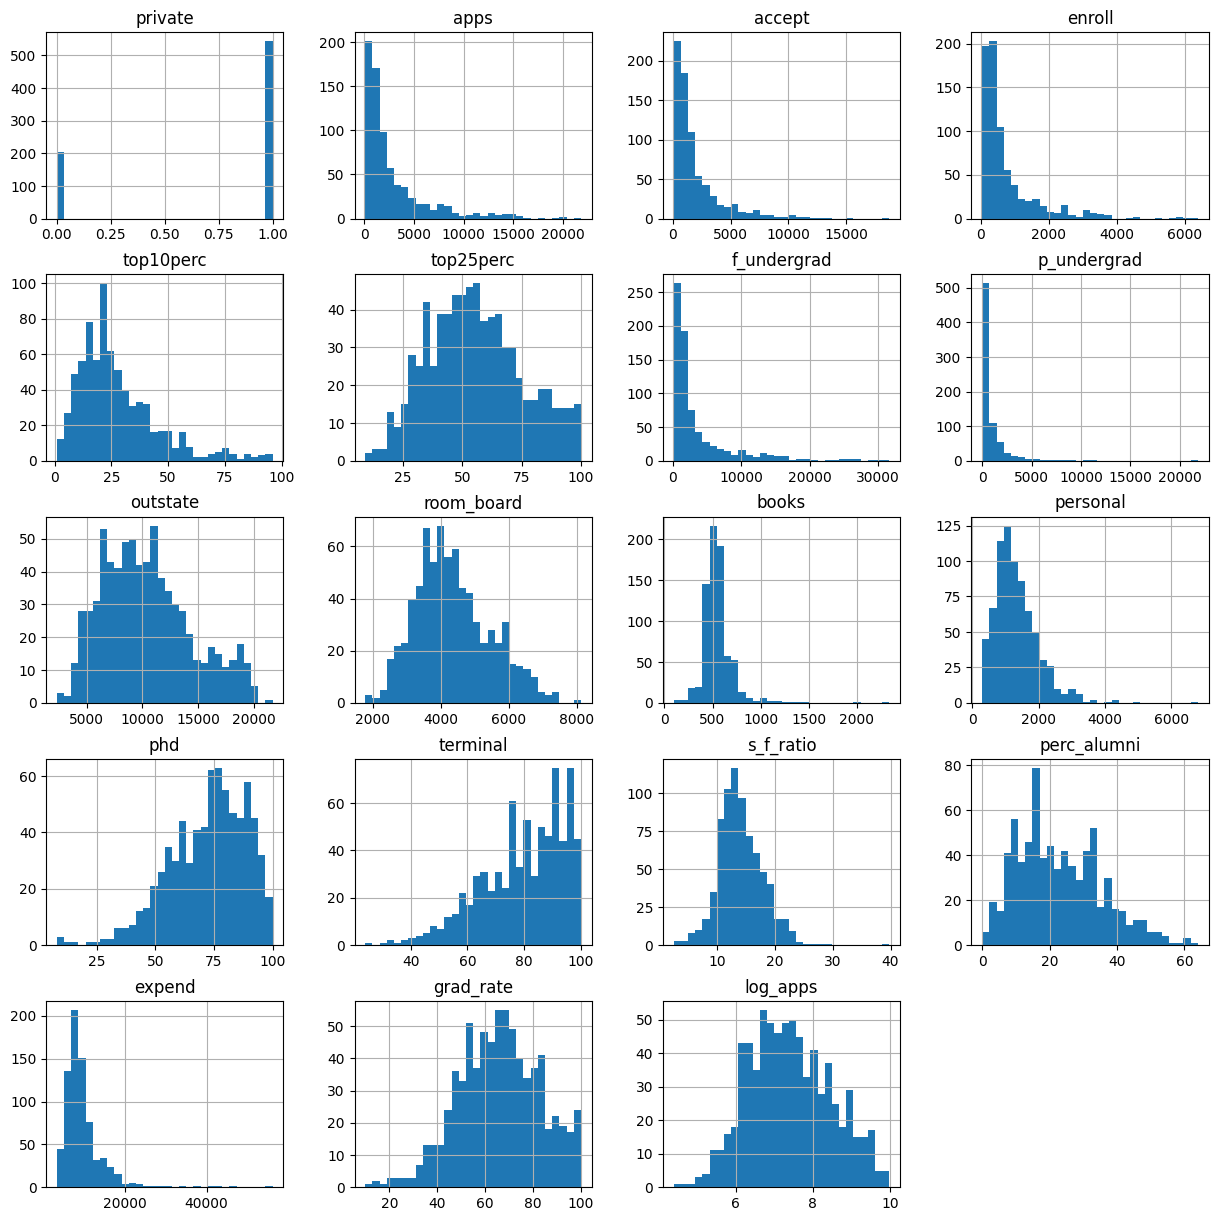

In [31]:
df.hist(figsize=(15, 15), bins=30)
plt.show()

## EDA: Plot a Heatmap of the Correlation Matrix
---

Heatmaps are an effective way to visually examine the correlational structure of your predictors.

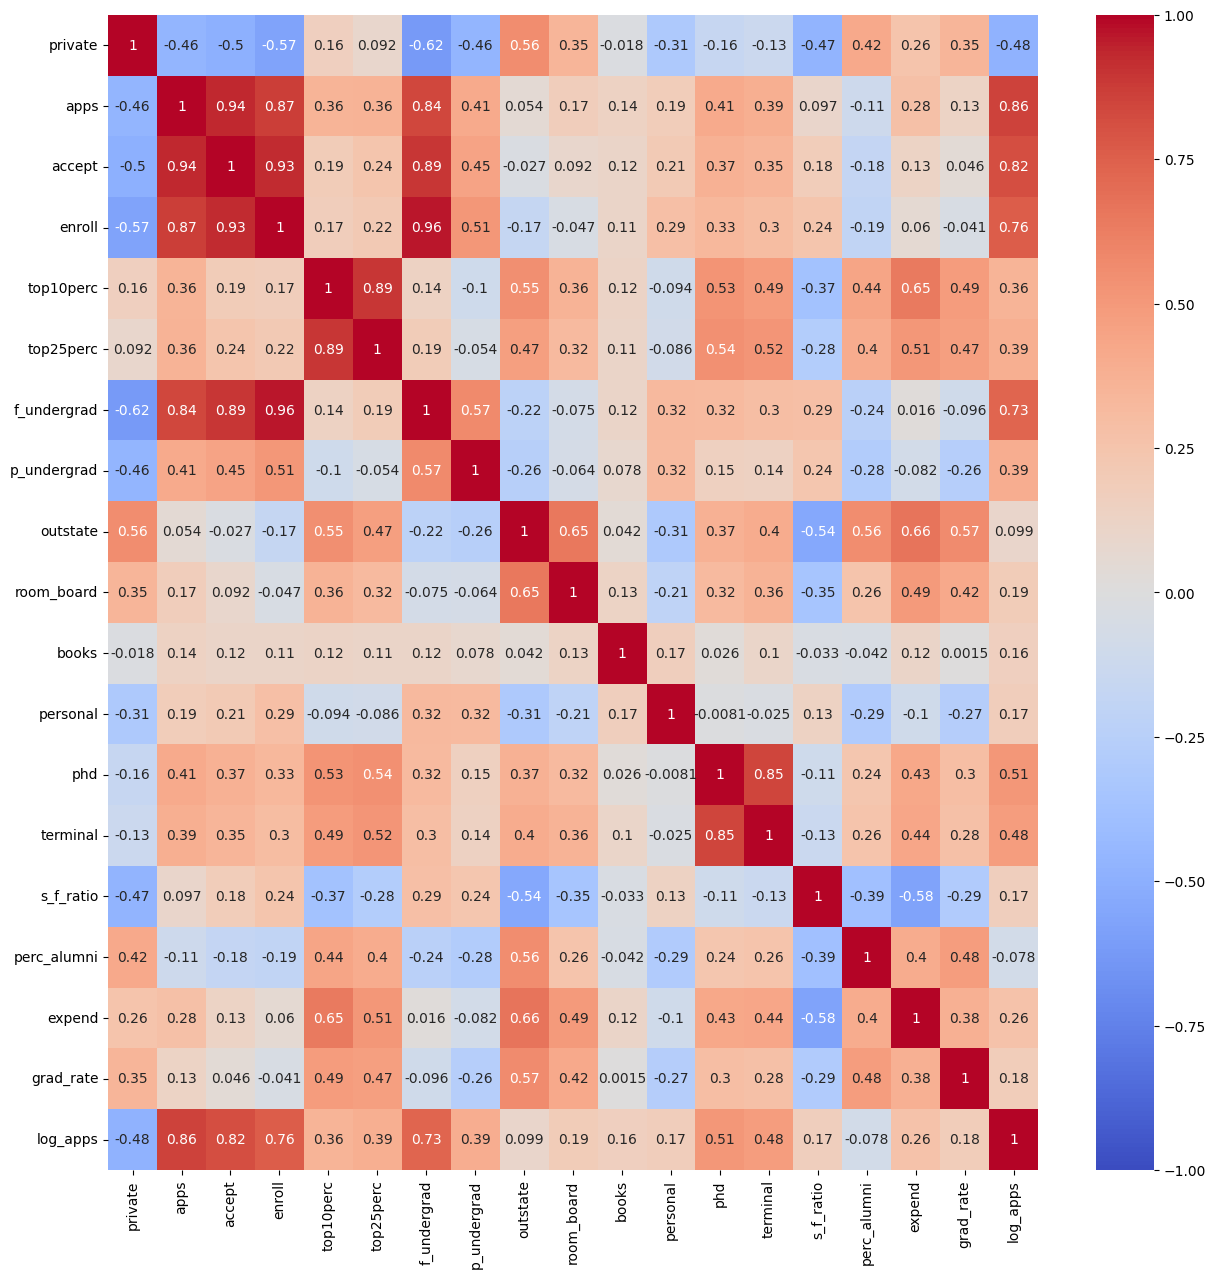

In [35]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap='coolwarm', )
plt.show()

##### What if I just wanted to look at the correlation to `apps`?

<Axes: >

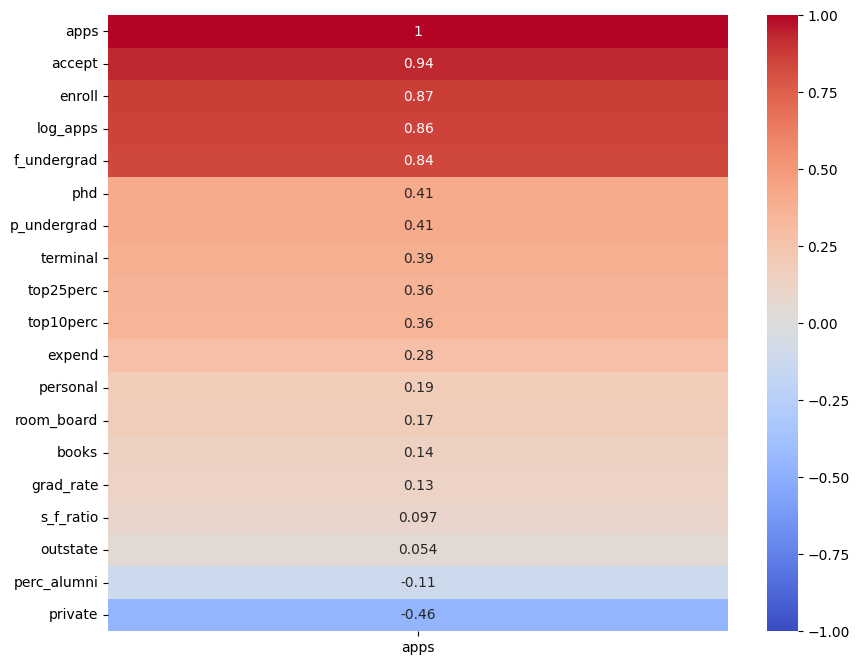

In [39]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True)['apps'].sort_values(ascending=False).to_frame(), annot=True, vmin=-1, vmax=1, cmap='coolwarm' )

## EDA: Use seaborn's `.pairplot()` method to create scatterplots
---

Let's create a pairplot to see how some of our stronger predictors correlate to our target (`apps`). Instead of creating a pairplot of the entire DataFrame, we can use the `y_vars` and `x_vars` params to get a smaller subset.

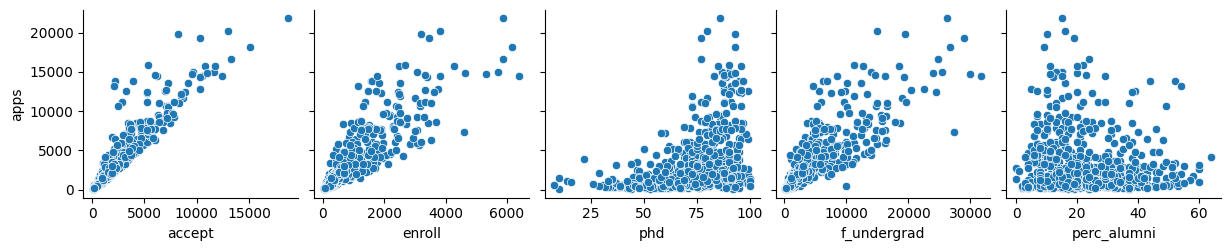

In [40]:
sns.pairplot(df, y_vars=['apps'], x_vars=['accept', 'enroll', 'phd', 'f_undergrad', 'perc_alumni'])
plt.show()

# <span style="color:#D34B47">📌 Model Prep </span>

## Features Matrix (`X`) and Target Vector (`y`)
---

What should our features be?

The `apps` column is our label: the number of applications received by that university.

In the cell below, create your `X` and `y` variables.

In [59]:
features = ['private', 'top10perc',
       'top25perc', 'f_undergrad', 'p_undergrad', 'outstate', 'room_board',
       'books', 'personal', 'phd', 'terminal', 's_f_ratio', 'perc_alumni',
       'expend', 'grad_rate']

X = df[features]    #  also, could have said X = df.drop[columns = ['apps','accept','enroll','university','log_apps']]
y = df['apps']

In [60]:
X

,private,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,1,23,52,2885,537,7440,3300,450,2200,70.0,78,18.1,12,7041,60
1,1,16,29,2683,1227,12280,6450,750,1500,29.0,30,12.2,16,10527,56
2,1,22,50,1036,99,11250,3750,400,1165,53.0,66,12.9,30,8735,54
3,1,60,89,510,63,12960,5450,450,875,92.0,97,7.7,37,19016,59
4,1,16,44,249,869,7560,4120,800,1500,76.0,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0,4,26,3089,2029,6797,3900,500,1200,60.0,60,21.0,14,4469,40
773,1,24,47,2849,1107,11520,4960,600,1250,73.0,75,13.3,31,9189,83
774,1,34,61,2793,166,6900,4200,617,781,67.0,75,14.4,20,8323,49
775,1,95,99,5217,83,19840,6510,630,2115,96.0,96,5.8,49,40386,99


## Train/Test Split
---

We always want to have a holdout set to test our model. Use the `train_test_split` function to split our `X` and `y` variables into a training set and a holdout set.

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Instantiate & Fit Our Model
---


In [62]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [63]:
np.set_printoptions(suppress=True)  # get rid of scientific notation
predictions = model.predict(X_test)
predictions

array([ 5468.46013061,  1568.27282233,  4317.08696999,  1611.86982292,
       11690.26961065,  2148.14309649,   731.60594292,  3077.26676047,
        1762.21946431,  4946.09366511,  5046.26857948,  -494.07027616,
        1332.81789158,   580.78388912,  4650.49432286,  2222.78217107,
       10524.71590998,  1892.30158434,  2131.82413445,  2614.67855652,
         804.8948887 ,  9137.46464877,   400.84522624,  9453.83191878,
        2331.24694405,  4579.52991938, 12514.43053904,  3746.89550581,
        4319.13610336,  1389.60391553,  1302.78783017,  2714.24491589,
        2621.83954923,   863.30975605,   219.37759984,  5647.92976217,
        4797.75994221,  2719.65750104,  3170.28144221,  1014.98852585,
         482.73728587,  2413.51014477,  1985.26327159,  1888.55361389,
        4382.53743054,  3930.45301396,  3893.6969417 ,  2787.80160903,
        1990.2120998 ,  2003.04876876,  2389.69642511,  7829.25871867,
        1267.75694656,  1245.61317299,  2180.71820452,  -467.81316031,
      

# <span style="color:#D34B47">📌 Evaluation </span>

## $R^2$ Score
---

Use `.score` to evaluate the $R^2$ score of our model.

In [64]:
# Training R2 Score:
model.score(X_train, y_train)

0.8269793960769837

In [65]:
# Testing R2 Score:
model.score(X_test, y_test)

0.7915343092045553

> Interpretation: 79.2% of the variability in the model can be explained by the features in the model. There does not appear to be any overfitting or underfitting and the model seems to generalize well.


## RMSE Score
---

Use `mean_squared_error` to evaluate the RMSE score of our model.

`mean_squared_error` requires two parameters:
- `y_true` : The actual y values
- `y_pred` : Our model's predicted y values

Therefore, we need to use our model to make predictions first!

In [66]:
# Make predictions on training set
train_preds = model.predict(X_train)

In [67]:
# Make predictions on test set
test_preds = model.predict(X_test)

In [69]:
# Calculate RMSE on training set
np.sqrt(mean_squared_error(y_train, train_preds))

1395.3527043168976

In [70]:
# Calculate RMSE on testing set
np.sqrt(mean_squared_error(y_test, test_preds))

1745.4773356257251

## How does this compare to our baseline?!
---
Remember, in regression tasks, calculating a baseline often involves using a simple and intuitive strategy, such as predicting the mean of the target variable for all instances. This baseline serves as a benchmark for model performance, and comparing the model's performance metrics, such as Root Mean Squared Error (RMSE), against this baseline helps assess the added value and predictive capability of the model over a straightforward, naively predicted baseline. If our model doesn't beat the baseline, why would we use a model?!

In [71]:
# Calculate the mean of our target in our test group
np.mean(y_test)

3198.7379679144383

In [73]:
# Show off np.full_like
np.full_like(y_test, np.mean(y_test), dtype=np.float64)

array([3198.73796791, 3198.73796791, 3198.73796791, 3198.73796791,
       3198.73796791, 3198.73796791, 3198.73796791, 3198.73796791,
       3198.73796791, 3198.73796791, 3198.73796791, 3198.73796791,
       3198.73796791, 3198.73796791, 3198.73796791, 3198.73796791,
       3198.73796791, 3198.73796791, 3198.73796791, 3198.73796791,
       3198.73796791, 3198.73796791, 3198.73796791, 3198.73796791,
       3198.73796791, 3198.73796791, 3198.73796791, 3198.73796791,
       3198.73796791, 3198.73796791, 3198.73796791, 3198.73796791,
       3198.73796791, 3198.73796791, 3198.73796791, 3198.73796791,
       3198.73796791, 3198.73796791, 3198.73796791, 3198.73796791,
       3198.73796791, 3198.73796791, 3198.73796791, 3198.73796791,
       3198.73796791, 3198.73796791, 3198.73796791, 3198.73796791,
       3198.73796791, 3198.73796791, 3198.73796791, 3198.73796791,
       3198.73796791, 3198.73796791, 3198.73796791, 3198.73796791,
       3198.73796791, 3198.73796791, 3198.73796791, 3198.73796

In [76]:
# Putting it all together -- Calculate the baseline RMSE
np.sqrt(mean_squared_error(y_test, np.full_like(y_test, np.mean(y_test), dtype=np.float64)))

3822.935048609202

> Interpretation: Since RMSE = 3823 is > than RMSE = 1745 generated by the model, the model is doing a good job of predicting applications.

# 🎉 We Did It!

# <span style="color:#D34B47">📌 Further Interpretation </span>

In [77]:
# Coefficients?
model.coef_

array([-732.08046153,   16.42508824,    1.80822662,    0.59113594,
         -0.10128227,    0.00686566,    0.43171571,    0.32977599,
         -0.18272114,    1.95250061,   -9.88659434,   28.9102381 ,
        -17.86410974,    0.10391908,   19.0368276 ])

In [81]:
# Let's make that a bit easier to read
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coef': model.coef_
})

sorted_df = coef_df.sort_values(by='coef', ascending=False)
sorted_df

,feature,coef
11,s_f_ratio,28.910238
14,grad_rate,19.036828
1,top10perc,16.425088
9,phd,1.952501
2,top25perc,1.808227
3,f_undergrad,0.591136
6,room_board,0.431716
7,books,0.329776
13,expend,0.103919
5,outstate,0.006866


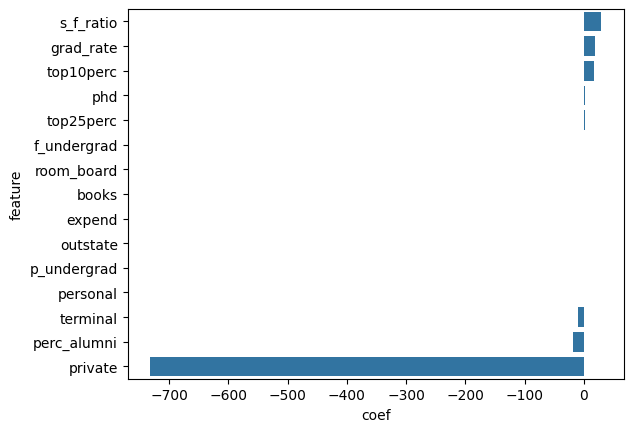

In [82]:
sns.barplot(data=sorted_df, x='coef', y='feature')
plt.show()

### How to Interpret These Coefficients:

The coefficient for `private` is negative, which suggests that, ALL ELSE BEING CONSTANT, private universities receive 732 fewer applications compared to public universities.